In [4]:
import os

# For KMeans memory leak
os.environ["OMP_NUM_THREADS"] = "6"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
try:
    df = pd.read_csv("../../../Data/Medical-Cost-Data/medical_cost.csv")
except:
    print(f"Data not found, make sure to run the medical_cost_preprocessing.ipynb file in its entirety to retrieve the data")

df.drop(columns=['charges'], inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

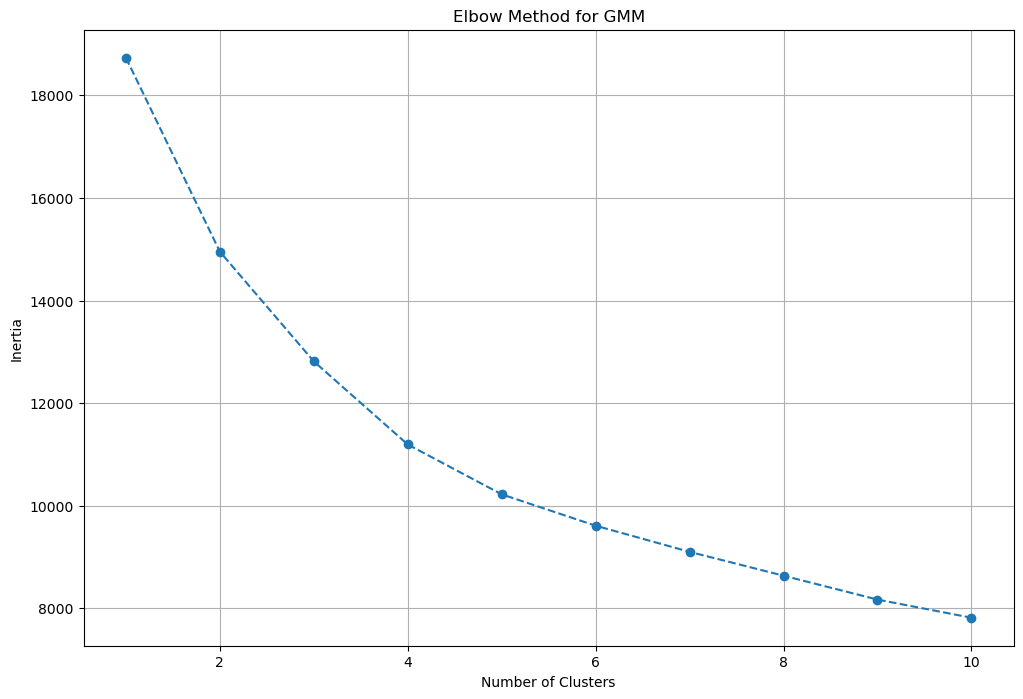

In [6]:
# Elbow Method

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for GMM')
plt.grid(True)
plt.show()

In [7]:
# The line appears to diminish around the 5th cluser, should use 5 for the number of clusters
elbow_k = 3

gmm = GaussianMixture(n_components=elbow_k, random_state=0, n_init=10)
gmm_cluster_labels = gmm.fit_predict(X_scaled)

# Create three principle components for 2D and 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

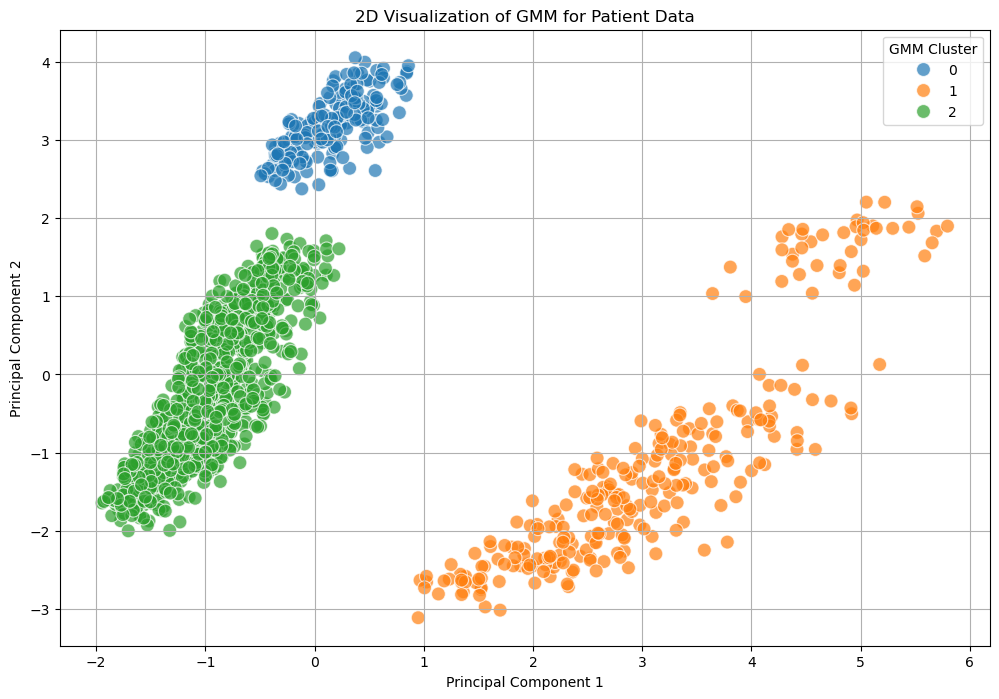

In [8]:
# 2D Plot of Clusters

pca_df = pd.DataFrame(X_pca, columns=['Principle Component 1', 'Principle Component 2', 'Principle Component 3'])
pca_df['GMM'] = gmm_cluster_labels
pca_df['GMM'] = pd.Categorical(pca_df['GMM'])

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df,
    x='Principle Component 1',
    y='Principle Component 2',
    hue='GMM',
    s=100,
    alpha=0.7
)

plt.title('2D Visualization of GMM for Patient Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='GMM Cluster')
plt.grid(True)
plt.show()

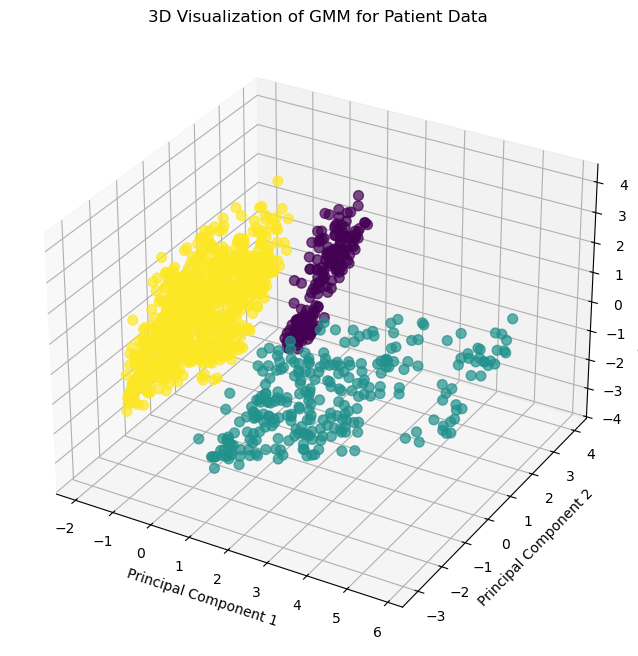

In [9]:
# 3D Visualization

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

colors = plt.cm.viridis(pca_df['GMM'].cat.codes / (elbow_k - 1))

ax.scatter(
    pca_df['Principle Component 1'], 
    pca_df['Principle Component 2'], 
    pca_df['Principle Component 3'], 
    c=colors, 
    s=50, 
    alpha=0.7
)

plt.title('3D Visualization of GMM for Patient Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [10]:
# See what each cluster is composed of

print(f"GMM Cluster Analysis Report")
df['Cluster'] = gmm_cluster_labels
cluster_analysis = df.groupby('Cluster').mean()

features_of_interest = ['age', 'bmi', 'smoker', 'children', 'age_squared', 'bmi_smoker', 'is_obese']
print(cluster_analysis[features_of_interest].to_markdown(floatfmt=".2f"))

GMM Cluster Analysis Report
|   Cluster |   age |   bmi |   smoker |   children |   age_squared |   bmi_smoker |   is_obese |
|----------:|------:|------:|---------:|-----------:|--------------:|-------------:|-----------:|
|         0 | 59.69 | 31.73 |     0.00 |       0.62 |       3569.78 |         0.00 |       0.60 |
|         1 | 38.51 | 30.71 |     1.00 |       1.11 |       1676.52 |        30.71 |       0.53 |
|         2 | 35.36 | 30.44 |     0.00 |       1.18 |       1388.56 |         0.00 |       0.51 |
